In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("heart.csv")


In [5]:
X = df.drop('target', axis=1)
y = df['target']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



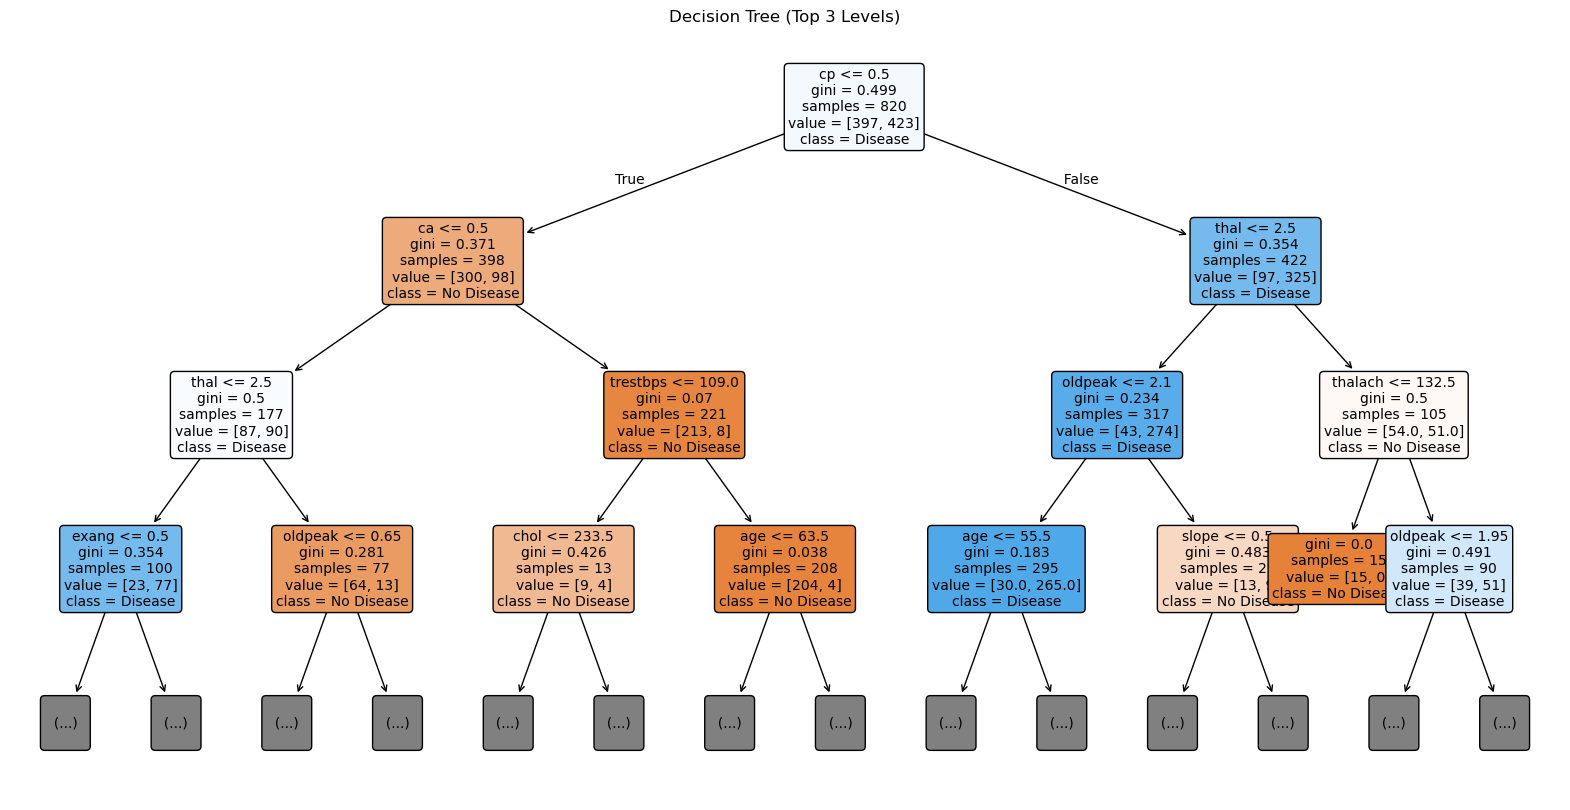

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit depth only for visualization (tree is still trained fully)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3  # Show only top 3 levels to avoid mess
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


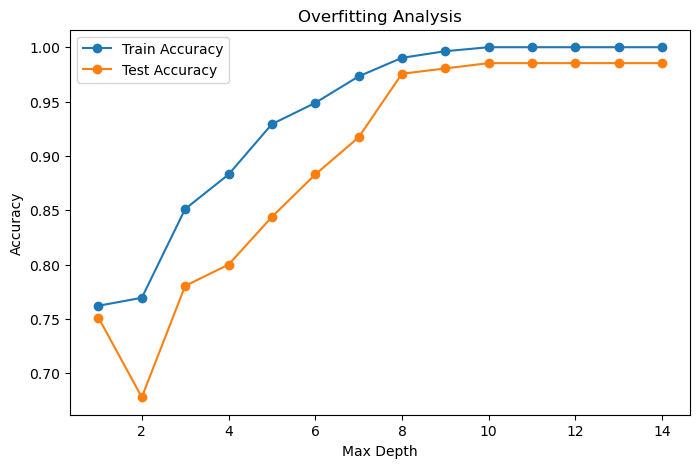

In [15]:
depths = range(1, 15)
train_acc, test_acc = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, marker='o', label="Train Accuracy")
plt.plot(depths, test_acc, marker='o', label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.show()

In [17]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



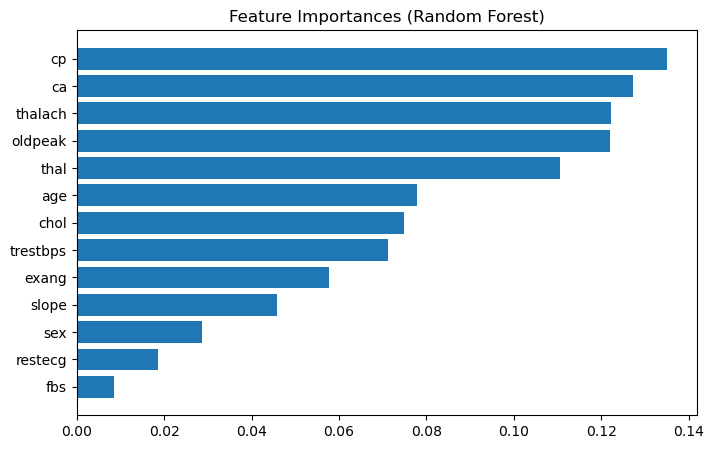

In [19]:
importances = rf_clf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances (Random Forest)")
plt.show()

In [21]:
cv_scores_dt = cross_val_score(dt_clf, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)

print("Decision Tree CV Accuracy: {:.2f} ± {:.2f}".format(cv_scores_dt.mean(), cv_scores_dt.std()))
print("Random Forest CV Accuracy: {:.2f} ± {:.2f}".format(cv_scores_rf.mean(), cv_scores_rf.std()))

Decision Tree CV Accuracy: 1.00 ± 0.00
Random Forest CV Accuracy: 1.00 ± 0.01
